In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

** Reading Titanic data set **

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.shape

(891, 12)

In [5]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [74]:
titanic.isnull().any().any()

False

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**EDA**

male      577
female    314
Name: Sex, dtype: int64


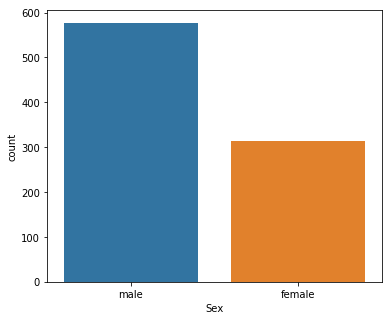

In [7]:
print(titanic.Sex.value_counts())
plt.figure(figsize=(6,5))
sns.countplot(x='Sex', data=titanic)

Total ** males are 577 and females 314**

3    491
1    216
2    184
Name: Pclass, dtype: int64


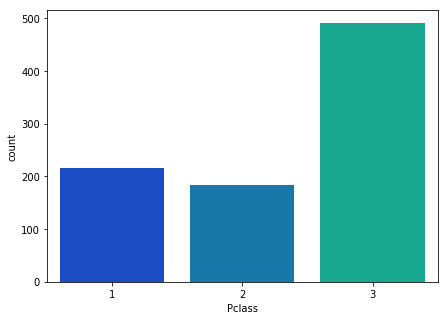

In [8]:
print(titanic.Pclass.value_counts())
plt.figure(figsize=(7,5))
sns.countplot(x='Pclass', data=titanic, palette='winter')

The number people in **Pclass 3 = 491, Pclass 2 = 184 Pclass 1 = 216**

 - ~55% in Pclass 3
 - ~24% in Pclass 1
 - ~20% in Pclass 2

0    549
1    342
Name: Survived, dtype: int64


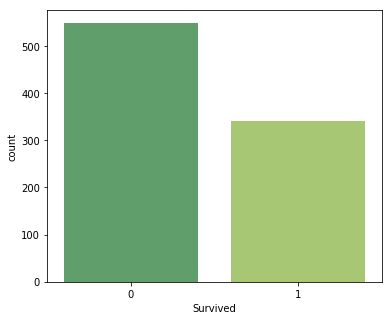

In [9]:
print(titanic.Survived.value_counts())
plt.figure(figsize=(6,5))
sns.countplot(x='Survived', data=titanic, palette='summer')

Total number of alive 542 and dead 549
- ~61% peoples died and 
- ~39% people survived

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


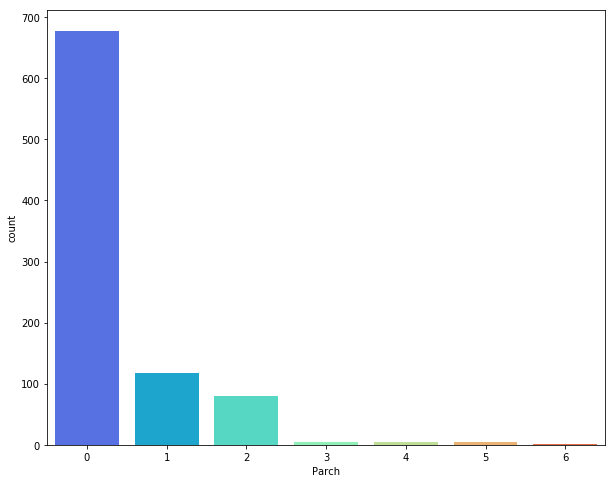

In [10]:
print(titanic.Parch.value_counts())
plt.figure(figsize=(10,8))
sns.countplot(x='Parch', data=titanic, palette='rainbow')

We can see with above chart that without any Parch are more and followed by 1 parch

- 76% without any parch
- 13% with 1 parch

S    644
C    168
Q     77
Name: Embarked, dtype: int64


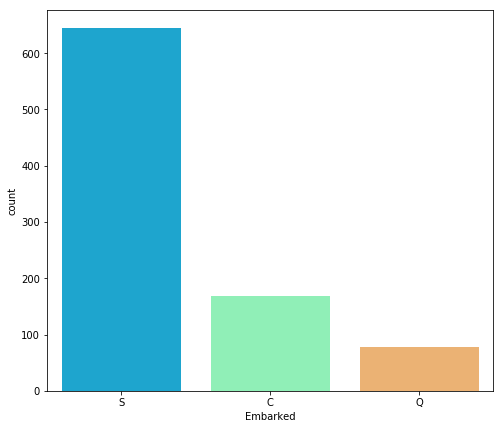

In [11]:
print(titanic.Embarked.value_counts())
plt.figure(figsize=(8,7))
sns.countplot(x='Embarked', data=titanic, palette='rainbow')

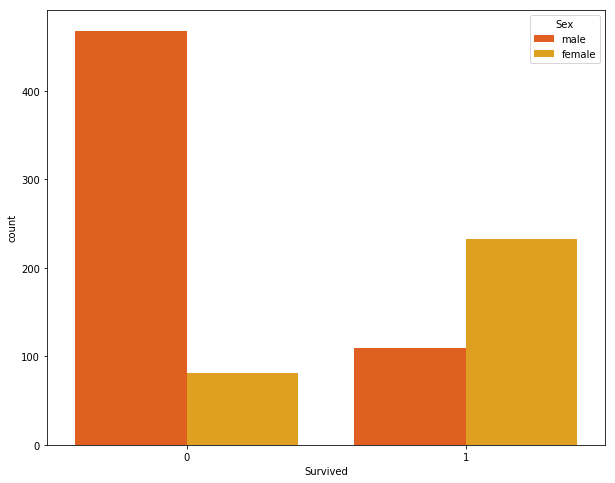

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(x='Survived', hue='Sex', data=titanic, palette='autumn')

From above figure we can conclude
- males die more than females
- females alive more than males

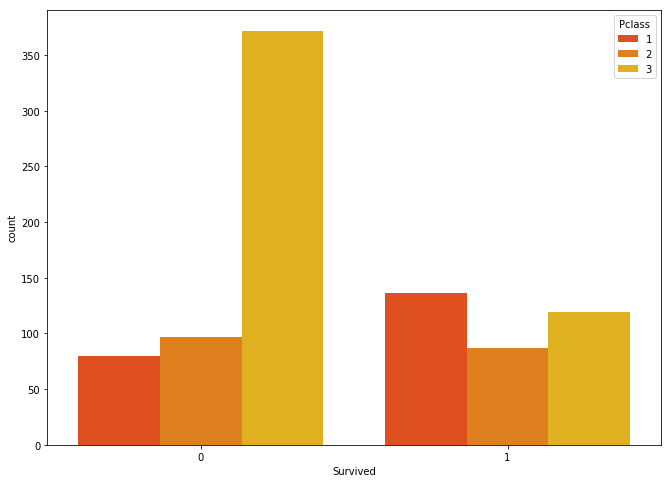

In [13]:
plt.figure(figsize=(11,8))
sns.countplot(x='Survived', hue='Pclass', data=titanic, palette='autumn')

From above figure we can infrence that
- pclass 3 die more in numbers
- pclass 1 alive more in number

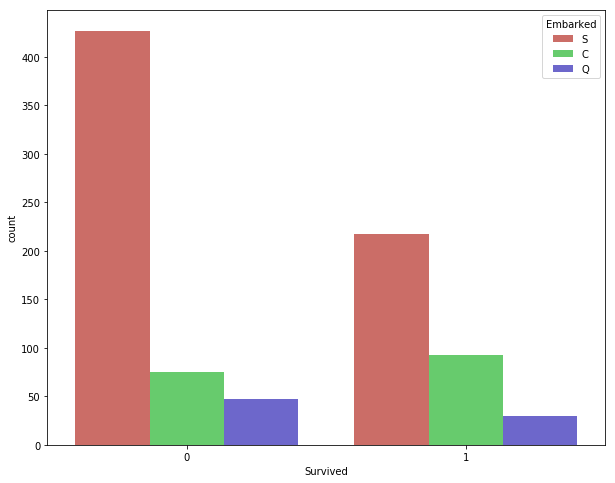

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(x='Survived', hue='Embarked', data=titanic, palette='hls')

We can see from above figure
- Emarked S die more
- Emarked S alive more also

In [15]:
def getSalutation(name):
#     print(name)
    if "Master." in name:
        return 'Master'
    elif "Mrs." in name:
        return 'Mrs'
    elif "Miss." in name:
        return 'Miss'
    elif "Mr." in name:
        return 'Mr'

In [17]:
titanic['Salutation'] = titanic['Name'].apply(getSalutation)

Mr        517
Miss      182
Mrs       125
Master     40
Name: Salutation, dtype: int64


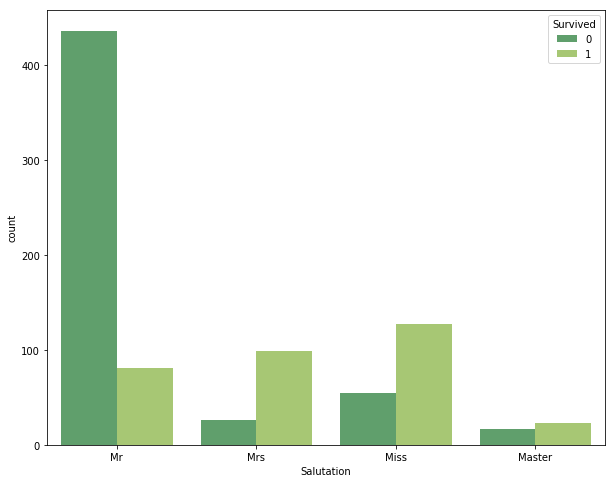

In [18]:
print(titanic.Salutation.value_counts())
plt.figure(figsize=(10,8))
sns.countplot(x='Salutation', hue='Survived', data=titanic, palette='summer')

- Mr die more
- Miss alive more
- Mrs, Miss, Master alive more than die

In [22]:
res = titanic.groupby(titanic.Pclass, as_index=False)['Fare'].sum()
print(res)

   Pclass        Fare
0       1  18177.4125
1       2   3801.8417
2       3   6714.6951


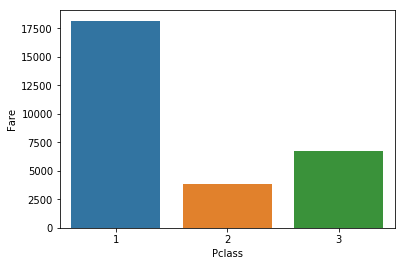

In [23]:
sns.barplot(x='Pclass', y='Fare', data=res)

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64


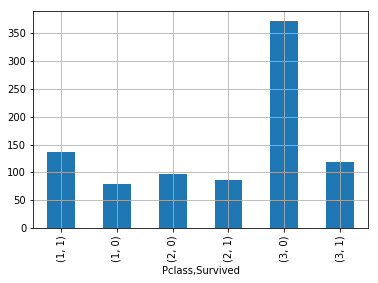

In [25]:
res = titanic.groupby(titanic.Pclass)['Survived'].value_counts()
print(res)
res.plot(kind='bar', grid=True)

In [26]:
titanic.pivot_table(values=['Age', 'Fare'], index=['Survived','Sex'])

Age       Fare
Survived Sex                         
0        female  25.046875  23.024385
         male    31.618056  21.960993
1        female  28.847716  51.938573
         male    27.276022  40.821484

** Data Cleaning **

**
As we can see that Cabin has approx 60% null data so it is good to drop it

In [27]:
titanic.drop('Cabin', axis=1, inplace=True)

In [28]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Salutation'],
      dtype='object')

- ** Embarked has only two null values and we Know S is more in number so we can replace null values with S **

In [29]:
titanic.Embarked.fillna('S', inplace=True)

In [30]:
titanic.Embarked.isnull().sum()

0

In [31]:
#Check Null value of Age
titanic.Age.isnull().sum()

177

In [32]:
titanic.Age.mean()

29.69911764705882

 - #Here Age has lot of missing data but we cannot replace merely with mean. We need to check other factor to replace missing values.

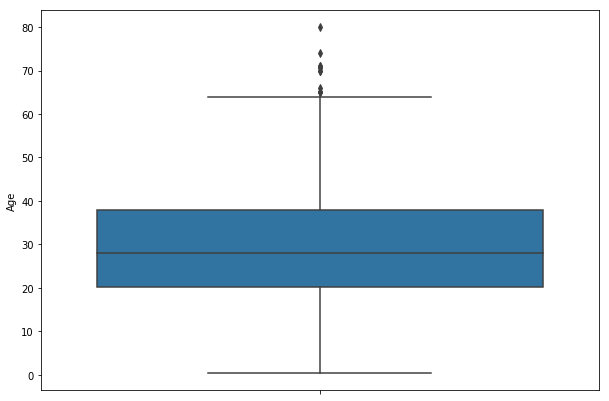

In [33]:
# titanic.boxplot('Age')
plt.figure(figsize=(10,7))
sns.boxplot(x='Age', data=titanic, orient='v')

We can see in above boxplot there are many outliers which is afecting our mean value also

In [34]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

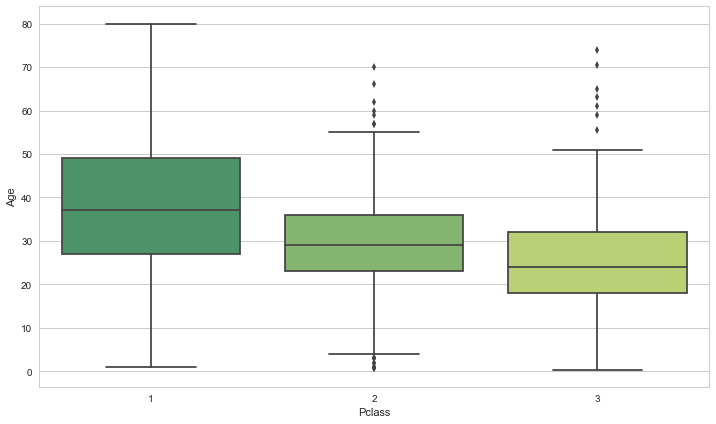

In [35]:
# titanic.boxplot(column='Age', by='Pclass')
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='summer')

#In above figure we can see that who belong to 
- class 1 there avg age approx '38'  
- class 2 approx avg age is '29' 
- class 3 approx avg age is '24'  

We can consider this for filling missing age values

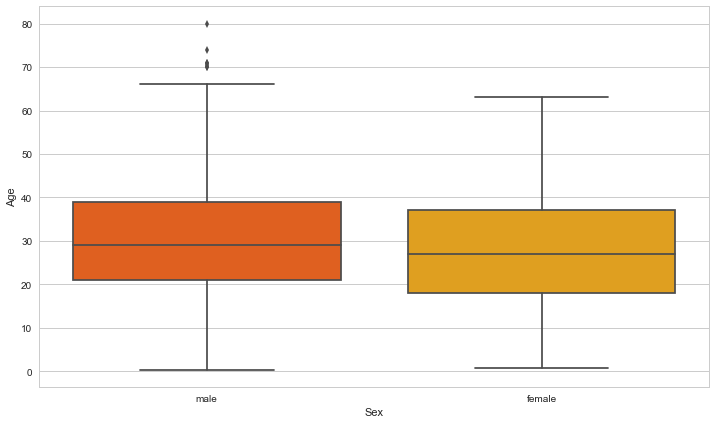

In [36]:
# titanic.boxplot(column='Age', by='Sex')
plt.figure(figsize=(12,7))
sns.boxplot(x='Sex',y='Age',data=titanic,palette='autumn')

Here we can see that 
- female avg age is '27' and 
- male avg is '29'

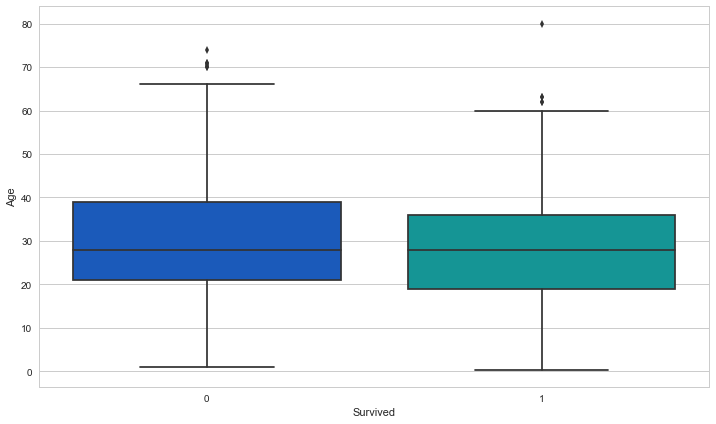

In [37]:
# titanic.boxplot(column='Age', by='Survived')
plt.figure(figsize=(12,7))
sns.boxplot(x='Survived',y='Age',data=titanic,palette='winter')

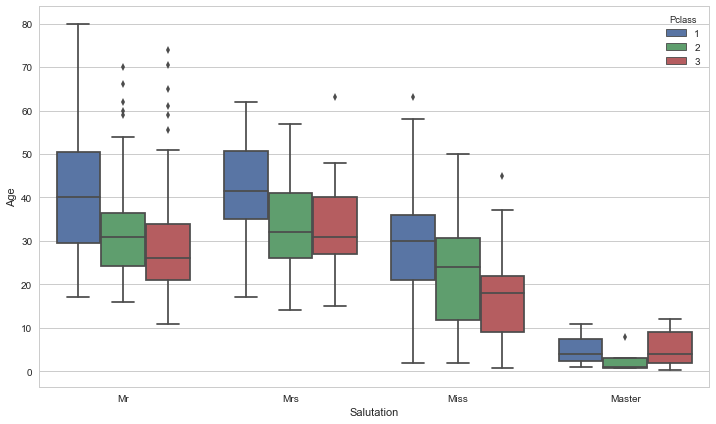

In [38]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Salutation', y='Age', hue='Pclass', data=titanic)

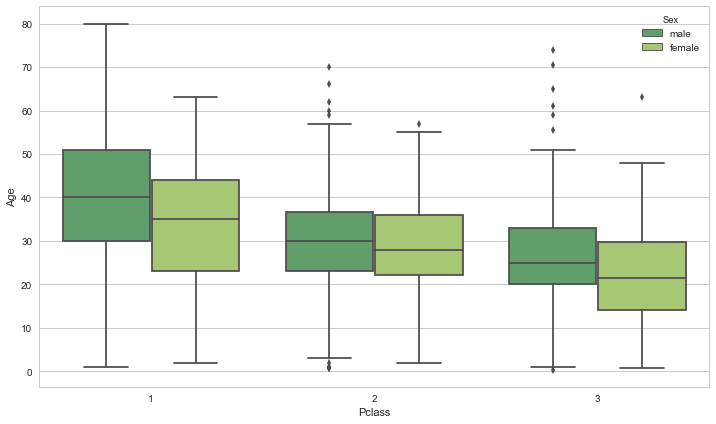

In [39]:
# titanic.boxplot(column='Age', by=['Pclass', 'Sex'])
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',hue='Sex' ,data=titanic,palette='summer')

In [40]:
#Now we use Pclass and sex for filling the missing age value

In [41]:
#need to improve this function
def fillMissingAge(colms):
#     print(colms)
    age = colms[0]
    pclass = colms[1]
    sex = colms[2]
    sal = colms[3]
    if pd.isnull(age):
        if pclass == 1 and sex == 'male' and sal == 'Mr':
            return 40
        elif pclass == 1 and sex == 'female' and sal == 'Mrs':
            return 33
        if pclass == 2 and sex == 'male' and sal == 'Mr':
            return 32
        elif pclass == 2 and sex == 'female' and sal == 'Mrs':
            return 32
        elif pclass == 3 and sex == 'male' and sal == 'Mr':
            return 25
        elif pclass == 3 and sex == 'female' and sal == 'Mrs':
            return 25
        
        elif pclass == 1 and sex == 'female' and sal == 'Miss':
            return 30
        if pclass == 2 and sex == 'male' and sal == 'Master':
            return 5
        elif pclass == 2 and sex == 'female' and sal == 'Miss':
            return 25
        elif pclass == 3 and sex == 'male' and sal == 'Master':
            return 5
        elif pclass == 3 and sex == 'female' and sal == 'Miss':
            return 18
        elif pclass == 1 and sex == 'male':
            return 40
    else:
        return age

In [42]:
# Filling Miss values in Age
titanic['Age'] = titanic[['Age','Pclass', 'Sex', 'Salutation']].apply(fillMissingAge, axis=1)

In [43]:
titanic.Age.describe()

count    891.000000
mean      28.918260
std       13.469218
min        0.420000
25%       21.000000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [83]:
from collections import Counter

**Datatype check**

This check is carried out to see what kind of datatypes the train set is comprised of : integers or characters or floats just to gain a better overview of the data we were provided with. One trick to obtain counts of the unique types in a python sequence is to use the Counter method, when you import the Collections module as follows:

In [84]:
Counter(titanic.dtypes.values)

Counter({dtype('uint8'): 6, dtype('int64'): 5, dtype('float64'): 2})

In [44]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.044000,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.066067,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.417463,0.083081,0.018443,-0.549500
Age,0.044000,-0.066067,-0.417463,1.000000,-0.270325,-0.180725,0.120310
SibSp,-0.057527,-0.035322,0.083081,-0.270325,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.180725,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.120310,0.159651,0.216225,1.000000


In [45]:
# We are converting categorical variable into dummies variable so that we can utilies those in regrssion Model
# Also Here we droping firest mean if we got tow dummies variable in Sex (male, female) 
# we keep only one either male or female since  we can say if it is not female then it is male or vice versa

In [46]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [47]:
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
titanic = pd.concat([titanic,sex,embark],axis=1)

In [48]:
salutation = pd.get_dummies(titanic['Salutation'],drop_first=True)

In [49]:
titanic.drop(['Salutation'], inplace=True, axis=1)

In [50]:
titanic = pd.concat([titanic,salutation],axis=1)

In [51]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,Mrs
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,1,0
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,1
2,3,1,3,26.0,0,0,7.9250,0,0,1,1,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,1,0


In [52]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,Mrs
PassengerId,1.000000,-0.005007,-0.035144,0.044000,-0.057527,-0.001652,0.012658,0.042939,-0.033606,0.022204,-0.073110,0.038850,0.011245
Survived,-0.005007,1.000000,-0.338481,-0.066067,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.149683,0.327093,-0.549199,0.339040
Pclass,-0.035144,-0.338481,1.000000,-0.417463,0.083081,0.018443,-0.549500,0.131900,0.221009,0.074053,-0.000576,0.142698,-0.149209
Age,0.044000,-0.066067,-0.417463,1.000000,-0.270325,-0.180725,0.120310,0.110181,-0.109550,0.034461,-0.291608,0.214507,0.180342
SibSp,-0.057527,-0.035322,0.083081,-0.270325,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.068734,0.087932,-0.250489,0.063407
Parch,-0.001652,0.081629,0.018443,-0.180725,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.060814,0.105567,-0.333905,0.225852
Fare,0.012658,0.257307,-0.549500,0.120310,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.162184,0.118271,-0.183766,0.105203
male,0.042939,-0.543351,0.131900,0.110181,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.119224,-0.686808,0.867334,-0.547600
Q,-0.033606,0.003650,0.221009,-0.109550,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.499421,0.171117,-0.078338,-0.089739
S,0.022204,-0.149683,0.074053,0.034461,0.068734,0.060814,-0.162184,0.119224,-0.499421,1.000000,-0.130650,0.112870,0.002689


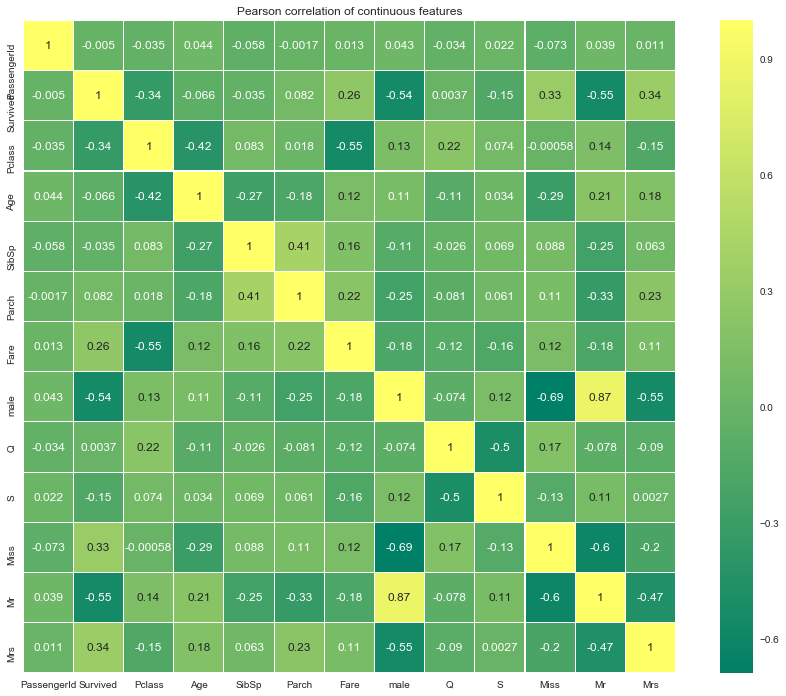

In [81]:
# sns.heatmap(titanic.corr())
colormap = plt.cm.summer
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1, size=12)
sns.heatmap(titanic.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [54]:
titanic.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,Mrs
Survived,,,,,,,,,,,,
0,447.016393,2.531876,29.620219,0.553734,0.329690,22.117887,0.852459,0.085610,0.777778,0.100182,0.794171,0.047359
1,444.368421,1.950292,27.791433,0.473684,0.464912,48.395408,0.318713,0.087719,0.640351,0.371345,0.236842,0.289474


In [55]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [56]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S', 'Miss', 'Mr', 'Mrs'],
      dtype='object')

In [57]:
X_cols = ['Pclass', 'Age', 'male', 'Mr', 'Miss', 'Mrs', 'S', 'Q', 'Parch', 'SibSp']

In [58]:
y_cols = ['Survived']

**Feature Selection**

In [59]:
logreg = LogisticRegression()

#rank all features, i.e continue the elimination until the last one
rfe = RFE(logreg, n_features_to_select=1)
rfe.fit(titanic[X_cols], titanic[y_cols] )
 
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X_cols)))
# rfe = RFE(logreg, 8)
# rfe = rfe.fit(titanic[X_cols], titanic[y_cols] )
# print(rfe.support_)
# print(rfe.ranking_)
# t = rfe.predict(titanic[X_cols])
# print(classification_report(titanic[y_cols], t))

Features sorted by their rank:
[(1, 'Mr'), (2, 'Mrs'), (3, 'Miss'), (4, 'Pclass'), (5, 'S'), (6, 'SibSp'), (7, 'male'), (8, 'Q'), (9, 'Parch'), (10, 'Age')]


ALL column are arrange in ranking order

In [82]:
from sklearn.feature_selection import mutual_info_classif

Mutual information (MI) [R172] between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency

In [85]:
mutual_info_classif(titanic[X_cols].values,titanic[y_cols].values,n_neighbors=3, random_state=17 )

array([ 0.06052731,  0.0451594 ,  0.14157116,  0.15303597,  0.0634593 ,
        0.05994475,  0.00245571,  0.027096  ,  0.0161816 ,  0.        ])

**Implementing the model**

In [60]:
# X = titanic[X_cols]
X = titanic[['Mr', 'Mrs', 'Miss','Pclass', 'Age', 'SibSp','male']]
y = titanic[y_cols]

In [61]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.442911
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Thu, 07 Dec 2017   Pseudo R-squ.:                  0.3349
Time:                        23:55:12   Log-Likelihood:                -394.63
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 1.019e-82
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mr            -1.7207      0.344     -4.997      0.000      -2.396      -1.046
Mrs            4.8172      0.

Above summary show that all feature have good p-value means we can consider these feature in model building

In [64]:
# X.drop(['S', 'Q', 'Parch'], axis=1, inplace=True)
# X.drop(['S'], axis=1, inplace=True)

**Model Building** and **Analysis the Model**

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=50)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.82      0.90      0.86       179
          1       0.82      0.70      0.75       116

avg / total       0.82      0.82      0.82       295



- The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

- The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

- The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

- The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

Confusion matrix, without normalization
[[161  18]
 [ 35  81]]


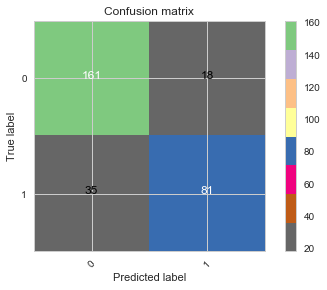

In [105]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix)
colormap = plt.cm.Accent_r
plot_confusion_matrix(confusion_matrix, classes=[0, 1], cmap=colormap, normalize=False)

The result is telling us that we have **242** correct predictions and **53** incorrect predictions. 
- Accuracy is (161+81)/(161+18+81+35) = 0.82

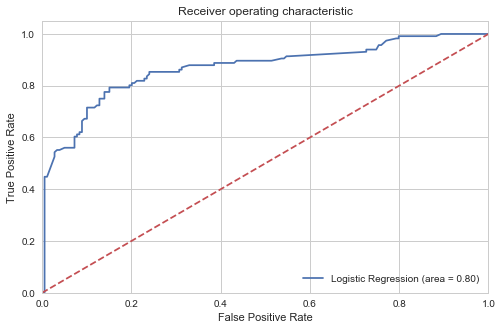

In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
# plt.show()

In [72]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.807


The average accuracy remains very close to the Logistic Regression model accuracy; hence, we can conclude that our model generalizes well.

In [106]:
# Cross Validation

from sklearn.model_selection import cross_val_score


scores_sgd_lasso = cross_val_score(logreg, y_test, y_pred, cv=5, n_jobs=-1, scoring = "neg_mean_squared_error")
sgd_ridge_lasso_scores = np.sqrt(-scores_sgd_lasso)
sgd_ridge_lasso_scores.mean()

0.42243500463253392

In [91]:
from sklearn.metrics import mean_squared_error
sgd_lasso_mse = mean_squared_error(y_test, y_pred)
sgd_lasso_rmse = np.sqrt(sgd_lasso_mse)
sgd_lasso_rmse

0.42386438509168534

In [98]:
# sns.swarmplot(x="Pclass", y="Survived",  data=titanic)
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')